Read the file daily.csv The file has ride data for the Durham, NC bus system over time

Change day of week to a proper US ordered factor and show that it works using the table() function

Use base R to create two new data frames (weekday and weekend) from the daily ride data with the appropriate observations.

Use base R to create a  vector called winterRiders which include only the numbers of riders (n_riders) on weekends in the winter months of Jan, Feb, and Mar and produce a histogram of them.

Use base R to do an even/odd (row number) split of the daily ride data into two dataframes; even and odd rows.

Use base R to do a random (set seed to 440) sample split of the data into train (60%), test (40%) dataframes respectively.

In [221]:
import pandas as pd
import numpy as np
import datetime
import tensorflow as tf
import sklearn
from sklearn.preprocessing import LabelEncoder


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from tensorflow import keras
from keras import layers
from keras.utils import to_categorical
from numpy import array

Change day of week to a proper US ordered factor

In [222]:
daily = pd.read_csv("../DATA/daily.csv")
daily['ride_date'] = pd.to_datetime(daily['ride_date'])
daily.sort_values(by = 'ride_date')
daily.head

<bound method NDFrame.head of      ride_date day_of_week month  n_rides  n_riders  n_unique_stops  \
0   2015-01-01       Thurs   Jan       58        37              44   
1   2015-01-02         Fri   Jan      134        83              93   
2   2015-01-03         Sat   Jan      145        84             100   
3   2015-01-04         Sun   Jan      101        57              63   
4   2015-01-05         Mon   Jan      182       117             109   
..         ...         ...   ...      ...       ...             ...   
359 2015-12-27         Sun   Dec      173        97             108   
360 2015-12-28         Mon   Dec      322       175             176   
361 2015-12-29        Tues   Dec      338       190             184   
362 2015-12-30         Wed   Dec      317       184             172   
363 2015-12-31       Thurs   Dec      301       167             166   

     n_unique_routes  
0                 14  
1                 24  
2                 25  
3                 14  
4 

Use base R to create two new data frames (weekday and weekend) from the daily ride data with the appropriate observations.


In [223]:
weekday = daily[daily['day_of_week'] != ('Sat' and 'Sun')]


In [224]:
winter_riders = daily[daily['month'] == ("Jan" or "Feb" or "Mar")]

In [225]:
even = daily[daily.index % 2 == 0]
odd =  daily[daily.index % 2 != 0]

In [226]:
daily.isna().sum()

ride_date          0
day_of_week        0
month              0
n_rides            0
n_riders           0
n_unique_stops     0
n_unique_routes    0
dtype: int64

One hot encoding

In [227]:
#Converting categories to numbers
day_of_week_array = array(daily['day_of_week'])
label_encoder = LabelEncoder()
day_of_week_array =label_encoder.fit_transform(day_of_week_array)
daily['day_of_week'] = day_of_week_array

#Converting numbers to bindary
daily['day_of_week'] = daily['day_of_week'].map({0: "Fri", 1: "Mon", 2: "Sat", 3: "Sun", 4: "Thurs", 5: "Tues", 6: "Wed"})
daily = pd.get_dummies(daily, columns=['day_of_week'], prefix='', prefix_sep='')





In [228]:
month_array = array(daily['month'])
label_encoder = LabelEncoder()
month_array =label_encoder.fit_transform(month_array)
daily['month'] = month_array

#Converting numbers to bindary
daily['month'] = daily['month'].map({0: "Apr", 1: "Aug", 2: "Dec", 3: "Feb", 4: "Jan", 5: "Jul", 6: "Jun",7: "Mar",8:"May",9:"Nov",10:"Oct",11:"Sep"})
daily = pd.get_dummies(daily, columns=['month'], prefix='', prefix_sep='')


In [229]:
len(daily.columns)

len(train_dataset.columns)

23

In [230]:
daily['riders'] = daily['n_riders']
daily = daily.drop(columns=['n_riders'])
daily = daily.drop(columns=['ride_date'])
train_dataset = daily.sample(frac=0.8, random_state=0)
test_dataset = daily.drop(train_dataset.index)

In [231]:
###Converting to an array here
train_val = train_dataset.values
test_val = test_dataset.values

In [232]:
train_dataset.head()

,n_rides,n_unique_stops,n_unique_routes,Fri,Mon,Sat,Sun,Thurs,Tues,Wed,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,riders
308,465,241,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,284
258,399,207,27,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,246
45,244,126,25,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,164
26,106,23,13,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,87
219,29,22,12,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,17


In [233]:
#Col 3 is predict for n_rriders

x_train =  train_val[:,:22]
x_train = np.asarray(x_train)
y_train =  train_val[:,22]
y_train  = np.asarray(y_train)
X_test =  test_val[:,:22]
X_test = np.asarray(X_test)
Y_test = test_val[:,22]
Y_test = np.asarray(Y_test)

In [238]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(10))

model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['mse','mae'])

model.fit(x_train, y_train,
          batch_size=64,
          epochs=48,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/48
5/5 [==============================] - 1s 46ms/step - loss: 23271.3672 - mse: 23271.3672 - mae: 140.6629 - val_loss: 20511.1973 - val_mse: 20511.1973 - val_mae: 133.9563
Epoch 2/48
5/5 [==============================] - 0s 8ms/step - loss: 14349.2881 - mse: 14349.2881 - mae: 109.2601 - val_loss: 11615.4072 - val_mse: 11615.4072 - val_mae: 99.6069
Epoch 3/48
5/5 [==============================] - 0s 8ms/step - loss: 7397.7964 - mse: 7397.7964 - mae: 75.0784 - val_loss: 4606.1338 - val_mse: 4606.1338 - val_mae: 59.5933
Epoch 4/48
5/5 [==============================] - 0s 8ms/step - loss: 2667.3347 - mse: 2667.3347 - mae: 39.6252 - val_loss: 898.0458 - val_mse: 898.0458 - val_mae: 21.6169
Epoch 5/48
5/5 [==============================] - 0s 8ms/step - loss: 1007.3915 - mse: 1007.3915 - mae: 24.5917 - val_loss: 593.5795 - val_mse: 593.5795 - val_mae: 20.9894
Epoch 6/48
5/5 [==============================] - 0s 8ms/step - loss: 1375.4972 - mse: 1375.4972 - mae: 29.8536 - val_loss

In [239]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 256)               5888      
                                                                 
 dropout_50 (Dropout)        (None, 256)               0         
                                                                 
 dense_77 (Dense)            (None, 64)                16448     
                                                                 
 dropout_51 (Dropout)        (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 10)                650       
                                                                 
Total params: 22,986
Trainable params: 22,986
Non-trainable params: 0
_________________________________________________________________


In [240]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test mse:', score[1])
print('Test mae:', score[2])

Test loss: 134.77923583984375
Test mse: 134.77923583984375
Test mse: 9.773576736450195


In [275]:

Test_list = []
Test_list = list(Test_list)
i = 0
while i < len(X_test):
    Test_list.append(model.predict(X_test)[i].mean())
    i +=1

3/3 [==============================] - 0s 2ms/step


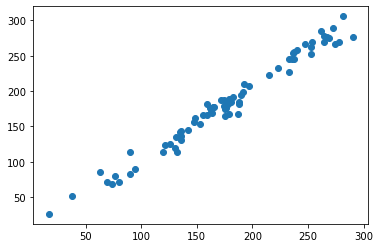

In [278]:

Test = Test_list
Actual = Y_test


df = pd.DataFrame({'Test': Test, 'Actual': Actual})
df.head()


import matplotlib.pyplot as plt

plt.scatter(x=Test,y=Actual)
plt.show()


In [262]:
Y_test

array([114,  52,  86,  26, 114, 189, 162, 199, 192, 177, 137, 156,  71,
       166, 176, 188, 169, 168, 120, 207, 170, 223, 177,  79, 135,  83,
       184, 143,  71, 166, 168, 176,  68,  89, 153, 145, 175, 179, 123,
       194, 182, 114, 269, 255, 246, 277, 253, 245, 270, 142, 210, 258,
       267, 181, 233, 285, 278, 306, 262, 289, 275, 181, 125, 131, 277,
       270, 187, 254, 266, 246, 227, 165, 184])

In [260]:
X_test.shape

(73, 22)

In [259]:
model.predict(X_test).shape

3/3 [==============================] - 0s 3ms/step


(73, 10)

In [164]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('riders')
test_labels = test_features.pop('riders')

train_dataset.describe().transpose()[['mean', 'std']]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))


In [165]:
normalizer.adapt(np.array(train_features))


In [166]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[465 241  28   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0]]

Normalized: [[ 1.88  1.69  0.62  2.47 -0.41 -0.4  -0.43 -0.41 -0.4  -0.4  -0.31 -0.34
  -0.29 -0.26 -0.33 -0.29 -0.3  -0.31 -0.31  3.41 -0.3  -0.29]]


In [167]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [180]:
linear_model.predict(train_features[:21])

1/1 [==============================] - 0s 68ms/step


array([[169.88095 ],
       [130.04623 ],
       [ 28.605843],
       [-32.940742],
       [ 18.0998  ],
       [ 37.615585],
       [161.07245 ],
       [165.79634 ],
       [ 17.916084],
       [ 57.532104],
       [ 44.89984 ],
       [155.71997 ],
       [ 24.6958  ],
       [ 99.69212 ],
       [205.25566 ],
       [-29.470108],
       [ 53.91673 ],
       [ 55.33808 ],
       [135.37787 ],
       [233.06387 ],
       [ 41.718796]], dtype=float32)

In [170]:
linear_model.layers[1].kernel


<tf.Variable 'dense_57/kernel:0' shape=(22, 1) dtype=float32, numpy=
array([[-0.2178182 ],
       [ 0.27047294],
       [-0.28908038],
       [-0.14175645],
       [ 0.13962418],
       [-0.1042195 ],
       [-0.49665806],
       [ 0.37704277],
       [-0.17416713],
       [-0.2823618 ],
       [ 0.45601285],
       [ 0.13999486],
       [ 0.419887  ],
       [-0.3315292 ],
       [ 0.0741834 ],
       [ 0.23845708],
       [ 0.33324766],
       [ 0.31468832],
       [ 0.31503272],
       [-0.31716117],
       [-0.11157376],
       [-0.17622486]], dtype=float32)>

In [171]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [172]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.69 s, sys: 319 ms, total: 4.01 s
Wall time: 3.53 s


In [178]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [179]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model